In [1]:
#import all necessary packages
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import os
%matplotlib inline

In [2]:
df = pd.read_csv('all_reviews_v4.csv', index_col=0)

In [3]:
#DATAFRAME for each medicine
ab = df.loc[df['medicine'] == 'Abilify']
ae = df.loc[df['medicine'] == 'Aerius']
amo = df.loc[df['medicine'] == 'Amoxicilline']
ce = df.loc[df['medicine'] == 'cerazette']
ch = df.loc[df['medicine'] == 'champix']
ci = df.loc[df['medicine'] == 'citalopram']
co = df.loc[df['medicine'] == 'Concerta']
cr = df.loc[df['medicine'] == 'Crestor']
cy = df.loc[df['medicine'] == 'Cymbalta']
de = df.loc[df['medicine'] == 'Deroxat']
do = df.loc[df['medicine'] == 'Doxycycline']
ef = df.loc[df['medicine'] == 'Effexor']
ke = df.loc[df['medicine'] == 'Keppra']
lev = df.loc[df['medicine'] == 'Levothyrox']
lex = df.loc[df['medicine'] == 'Lexapro']
ly = df.loc[df['medicine'] == 'Lyrica']
met = df.loc[df['medicine'] == 'Metformine']
meth = df.loc[df['medicine'] == 'Methotrexate']
mi = df.loc[df['medicine'] == 'Mirena']
pa = df.loc[df['medicine'] == 'Paroxetine']
pr = df.loc[df['medicine'] == 'Propranolol']
ro = df.loc[df['medicine'] == 'Roaccutane']
sero = df.loc[df['medicine'] == 'Seroplex']
ser = df.loc[df['medicine'] == 'Sertraline']
sim = df.loc[df['medicine'] == 'Simvastine']
ta = df.loc[df['medicine'] == 'Tahor_review']
tam = df.loc[df['medicine'] == 'Tamoxifene']
tr = df.loc[df['medicine'] == 'Tramadol']
va = df.loc[df['medicine'] == 'Valdoxan']
vi = df.loc[df['medicine'] == 'Victoza']

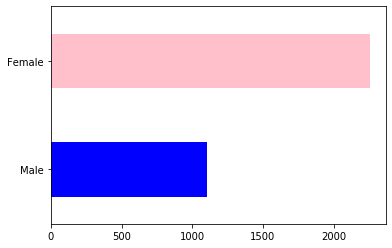

In [4]:
#overall population data
df.gender.value_counts().sort_values().plot(kind = 'barh', color = ['blue','pink'], )

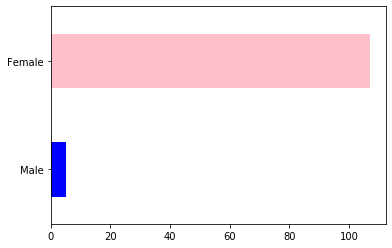

In [5]:
#eg of one medicine: Tamoxifene
tam.gender.value_counts().sort_values().plot(kind = 'barh', color = ['blue','pink'])

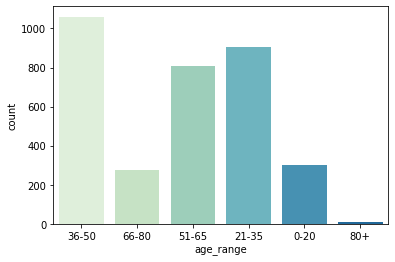

In [6]:
#age distribution of the population 
var1 = df['age_range']
sns.countplot(x=var1, palette='GnBu')

In [7]:
#create new dataframe counting age range to create a population pyramid
df['count'] = 1
df_pyra = df.pivot_table('count', columns='gender', index='age_range', aggfunc='sum').reset_index()
df_pyra

gender,age_range,Female,Male
0,0-20,195,105
1,21-35,653,252
2,36-50,744,316
3,51-65,530,278
4,66-80,127,147
5,80+,4,7


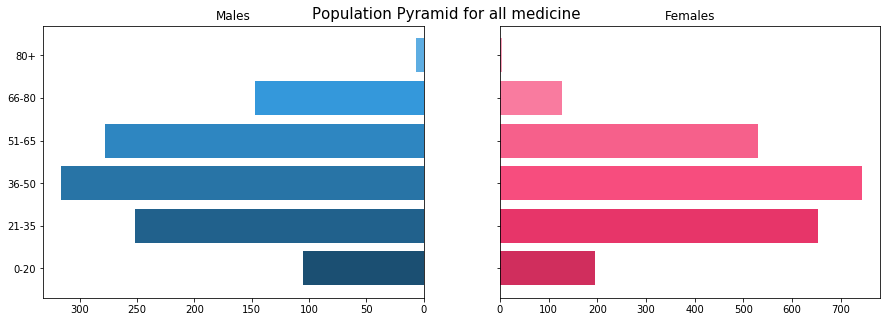

In [8]:
#create age pyramid for all medicine
y = range(0, len(df_pyra))
x_male = df_pyra['Male']
x_female = df_pyra['Female']

fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(15, 5))

plt.figtext(.5,.9,"Population Pyramid for all medicine ", fontsize=15, ha='center')

axes[0].barh(y, x_male, align='center', color=['#1B4F72','#21618C','#2874A6','#2E86C1','#3498DB','#5DADE2'])
axes[0].set(title='Males')
axes[1].barh(y, x_female, align='center', color=['#D02E5D','#E73569','#F74D7E','#F6608B','#F97B9F','#FA9EB8'])
axes[1].set(title='Females')

axes[0].set(yticks=y, yticklabels=['0-20','21-35','36-50','51-65','66-80','80+'])
axes[0].invert_xaxis()

plt.show()

In [13]:
ab

,medicine,date,gender,age,dose,disease,comment,efficiency,quantity_of_secondary_effects,severity_of_secondary_effects,...,depression,fatigue,stomache_ache,digestive_issues,constipation,acne,hallucinations,dizziness,total,count
2240,Abilify,30/11/2020,Female,20.0,5mg,Other,J'ai eu une expérience avec l'abilify il y a 2...,1,5,5,...,False,False,False,False,False,False,False,False,True,1
2241,Abilify,16/10/2020,Male,16.0,30mg,Schizophrenia,Mon fils est atteint de schizophrénie.\r\nIl e...,2,5,3,...,False,False,False,False,False,False,False,False,True,1
2242,Abilify,09/10/2020,Female,57.0,15mg,Psychic problems,"Bonjour, je suis tombée malade il y a six mois...",1,4,4,...,False,False,False,False,False,False,False,False,True,1
2243,Abilify,04/09/2020,Female,42.0,10mg,Depression,J'ai souffert de dépression avec troubles de l...,5,3,1,...,False,False,False,False,False,False,False,False,True,1
2244,Abilify,30/08/2020,Female,57.0,15mg,Other,"Je suis tombée malade en 2002, les médecins et...",4,2,1,...,False,False,False,False,False,False,False,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2347,Abilify,16/07/2014,Male,27.0,NaN,Bipolar disorder / manic depressive disorder,A 20 ans mon médecin m'a prescrit du solian po...,5,2,2,...,False,False,False,False,False,False,True,False,True,1
2348,Abilify,16/07/2014,Male,32.0,NaN,Schizophrenia,Je ne recommande pas ce type de médicament. L'...,1,5,5,...,False,False,False,False,False,False,False,False,True,1
2349,Abilify,07/07/2014,Female,41.0,NaN,Other,NaN,1,5,5,...,False,False,False,False,False,False,False,False,False,1
2350,Abilify,30/06/2014,Female,51.0,NaN,Tired,"Prescrit en complément d'un antidépresseur, 1/...",5,2,2,...,False,False,False,False,False,False,False,False,True,1


In [17]:
#create new dataframe counting age range to create a population pyramid, eg with abilify medicine
ab['count'] = 1
df_pyra = ab.pivot_table('count', columns='gender', index='age_range', aggfunc='sum')

/Users/juliettepiccolin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


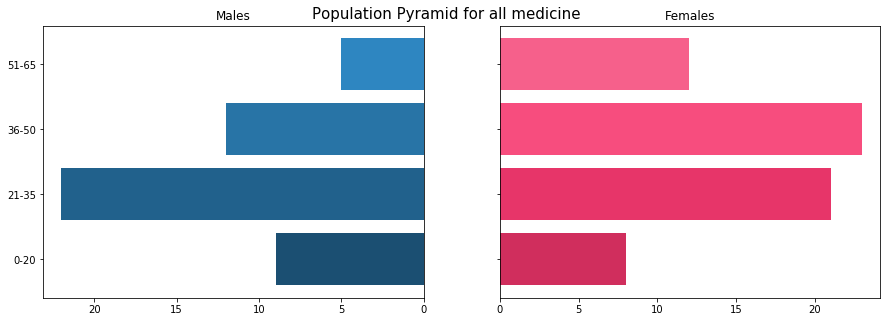

In [18]:
#create age pyramid for abilify medicine
#idea is to do this for all medicine (when possible), and have a compare and contrast function on the app
y = range(0, len(df_pyra))
x_male = df_pyra['Male']
x_female = df_pyra['Female']

fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(15, 5))

plt.figtext(.5,.9,"Population Pyramid for all medicine ", fontsize=15, ha='center')

axes[0].barh(y, x_male, align='center', color=['#1B4F72','#21618C','#2874A6','#2E86C1','#3498DB','#5DADE2'])
axes[0].set(title='Males')
axes[1].barh(y, x_female, align='center', color=['#D02E5D','#E73569','#F74D7E','#F6608B','#F97B9F','#FA9EB8'])
axes[1].set(title='Females')

axes[0].set(yticks=y, yticklabels=['0-20','21-35','36-50','51-65','66-80','80+'])
axes[0].invert_xaxis()

plt.show()

In [19]:
#overview of average scores of each column
scores = pd.pivot_table(df, values=["efficiency","quantity_of_secondary_effects","severity_of_secondary_effects",
                                   "ease_of_use"], index="medicine", aggfunc=np.mean).reset_index()
scores

,medicine,ease_of_use,efficiency,quantity_of_secondary_effects,severity_of_secondary_effects
0,Abilify,4.178571,2.607143,3.482143,3.241071
1,Aerius,4.607143,3.285714,2.839286,2.500000
2,Amoxicilline,4.062500,2.776786,3.785714,3.125000
3,Cerazette,4.383929,4.196429,3.696429,3.142857
4,Champix,4.660714,4.321429,2.741071,2.419643
5,Citalopram,4.589286,3.375000,2.982143,2.758929
6,Concerta,4.580357,3.883929,3.000000,2.687500
7,Crestor,4.348214,3.000000,3.973214,3.625000
8,Cymbalta,4.250000,3.205357,3.455357,3.053571
9,Deroxat,4.455357,3.428571,3.223214,2.633929


In [20]:
ab_scores = pd.pivot_table(ab, values=["efficiency","quantity_of_secondary_effects","severity_of_secondary_effects",
                                   "ease_of_use"], index="medicine", aggfunc=np.mean).reset_index()
ab_scores

,medicine,ease_of_use,efficiency,quantity_of_secondary_effects,severity_of_secondary_effects
0,Abilify,4.178571,2.607143,3.482143,3.241071


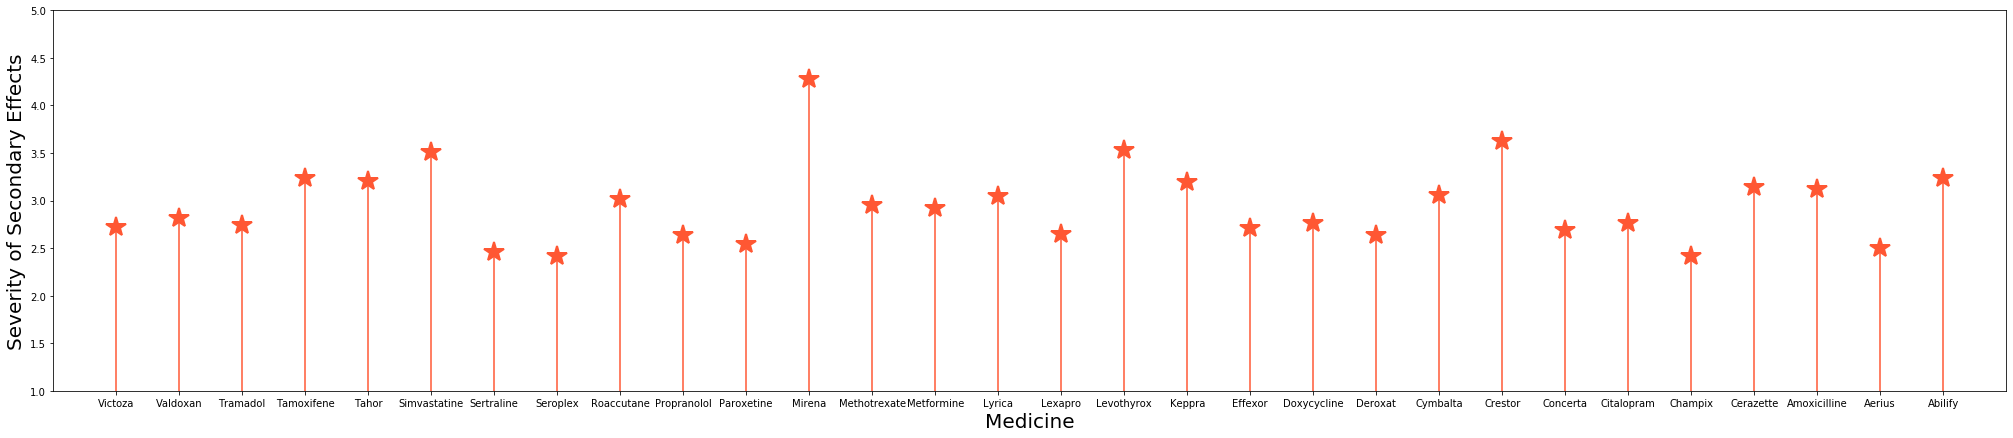

In [21]:
plt.figure(figsize=(35,7))
(markerline, stemlines, baseline) = plt.stem(scores['medicine'],
                                             scores['severity_of_secondary_effects'], use_line_collection=True)
plt.setp(markerline, marker='*', markersize=20,
         markeredgewidth=2, color='#FF5733')
plt.setp(stemlines, color='#FF5733')



plt.tick_params(labelsize=10)
plt.xlabel('Medicine', size=20)
plt.ylabel('Severity of Secondary Effects', size=20)
plt.ylim(bottom=1, top=5)
plt.xlim(left=30, right=-1)  

plt.show()